# Objective

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

# About organization

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

# Problem Statement

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot

In [2]:
data=pd.read_csv('Country-data.csv')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

In [4]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

## Data Exploration & Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Lets set country as index. As it is a unique identifier of a row.

In [7]:
data.set_index('country',inplace=True)

In [8]:
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [9]:
# Lets look at the correlations

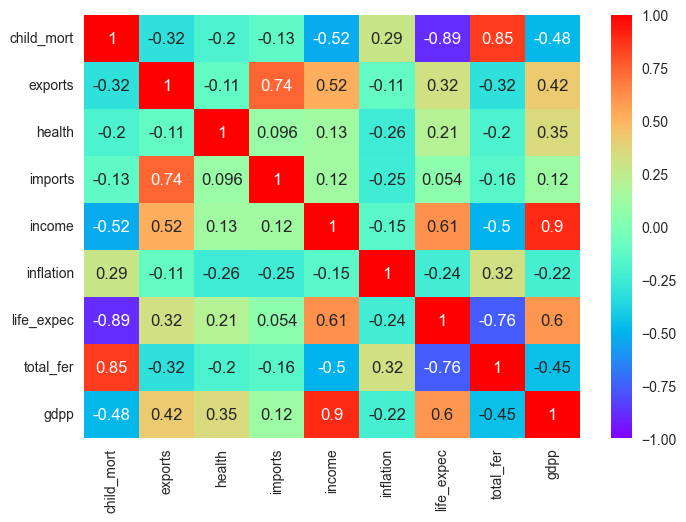

In [10]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True,cmap='rainbow')
plt.show()

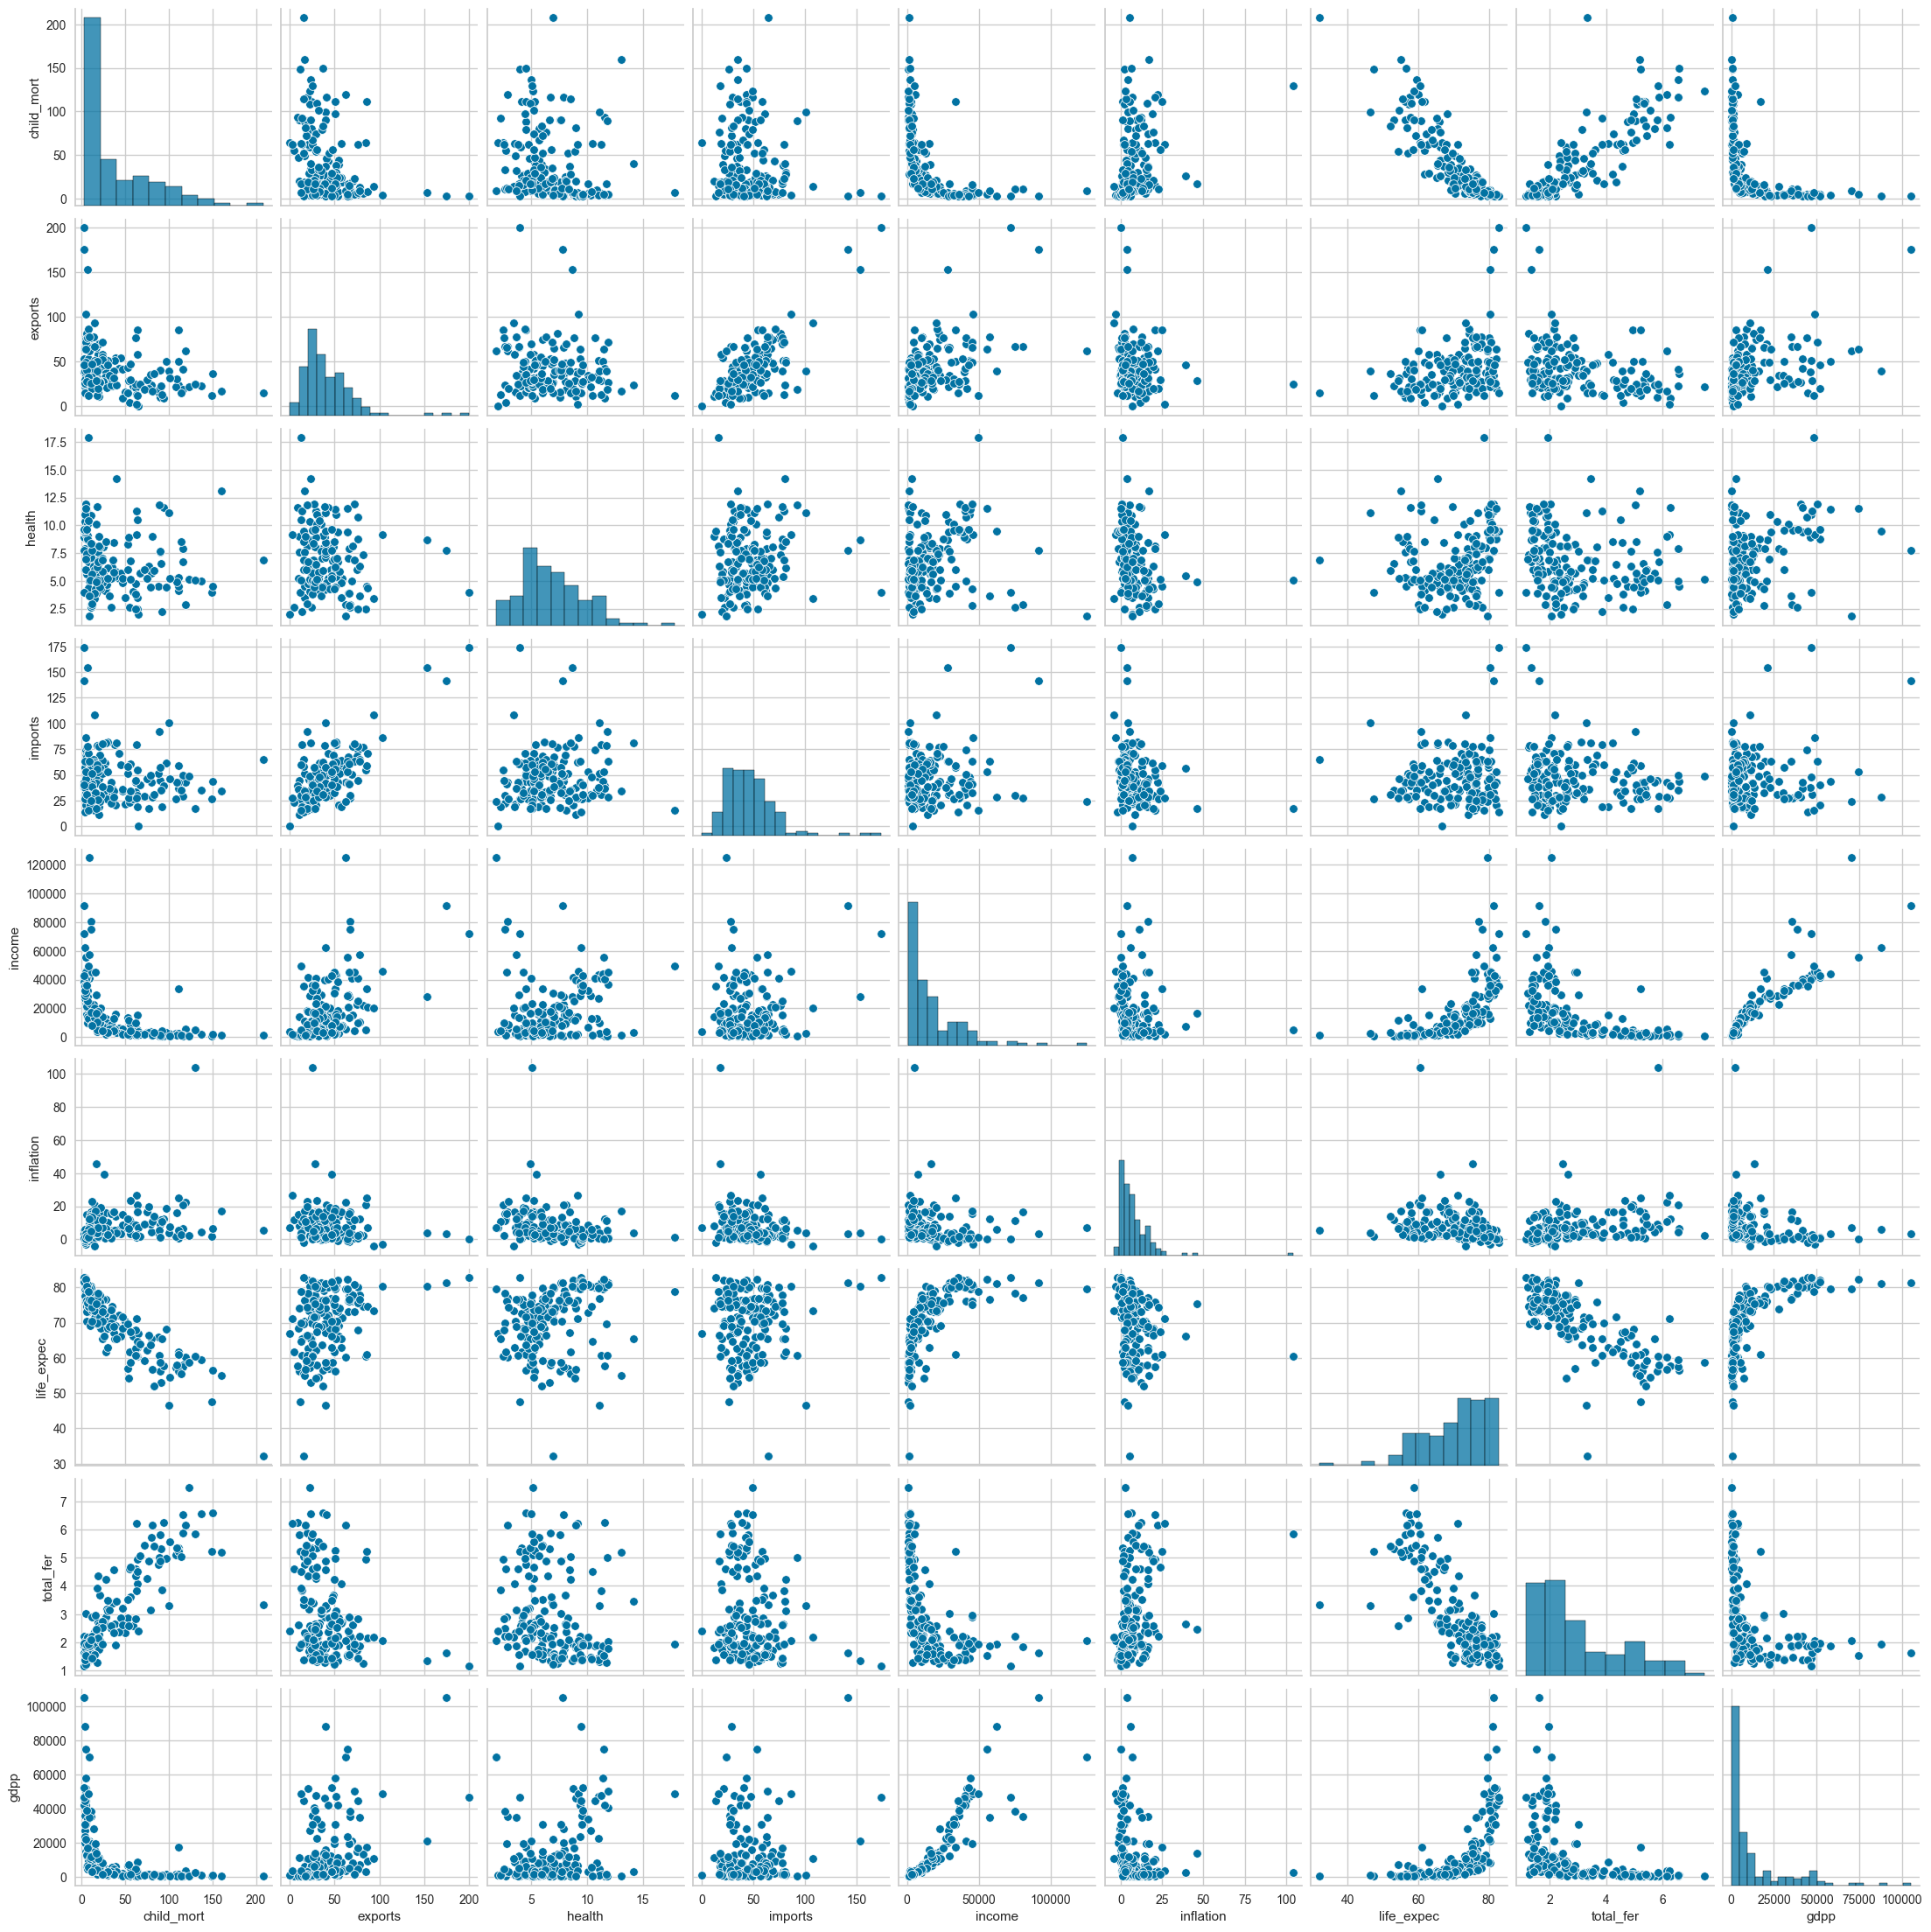

In [11]:
sns.pairplot(data)
plt.show()

In [12]:
# Lets check for Null values

In [13]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [14]:
# Check for Outliers

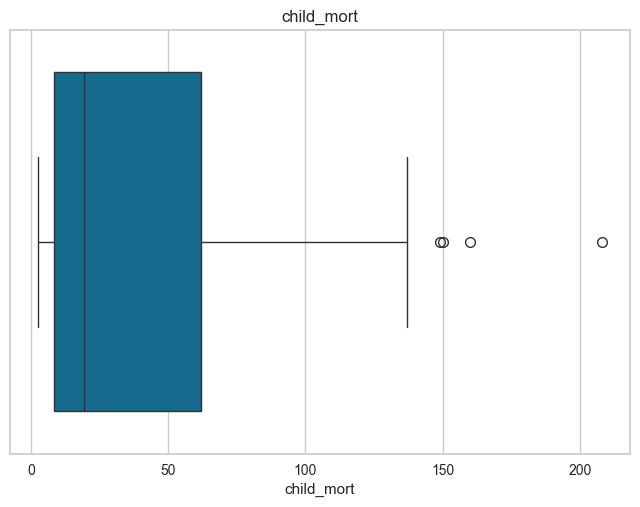

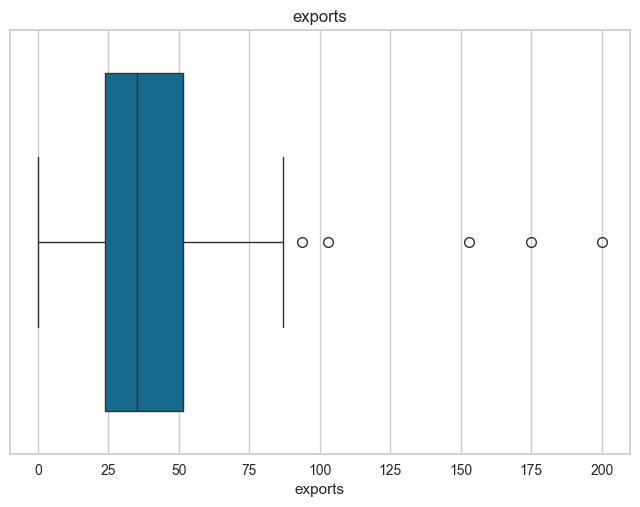

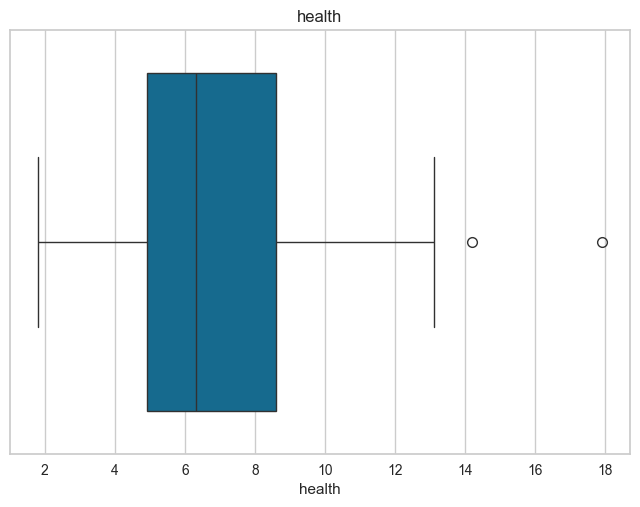

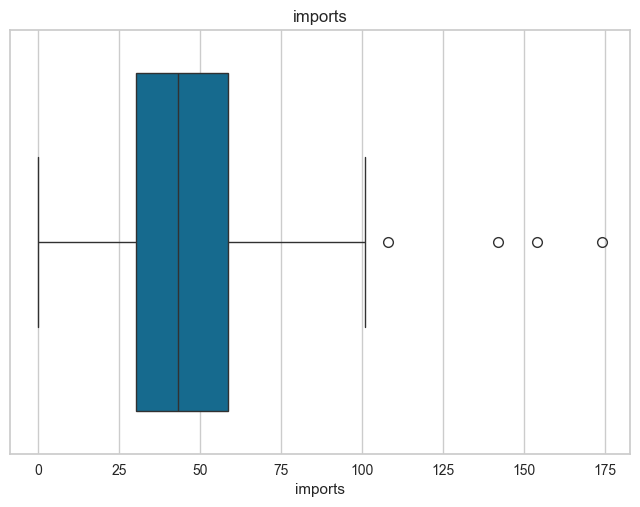

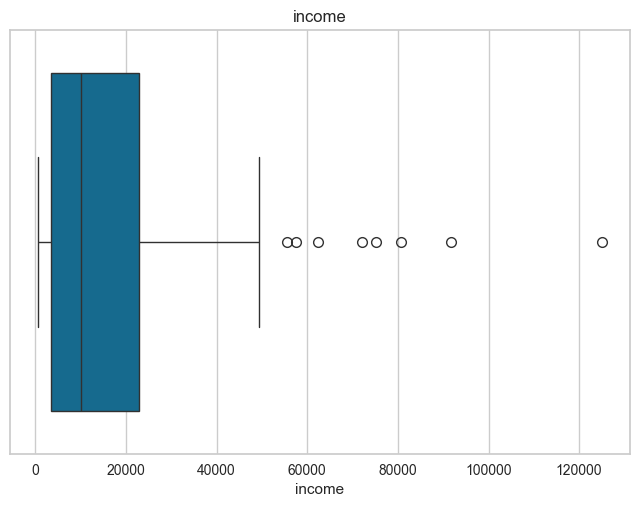

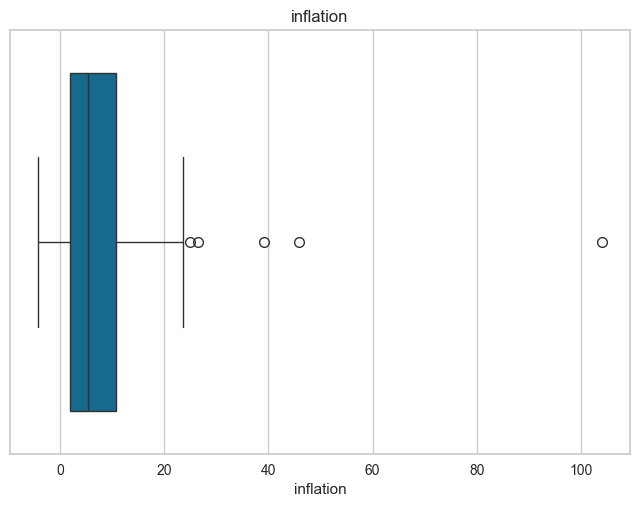

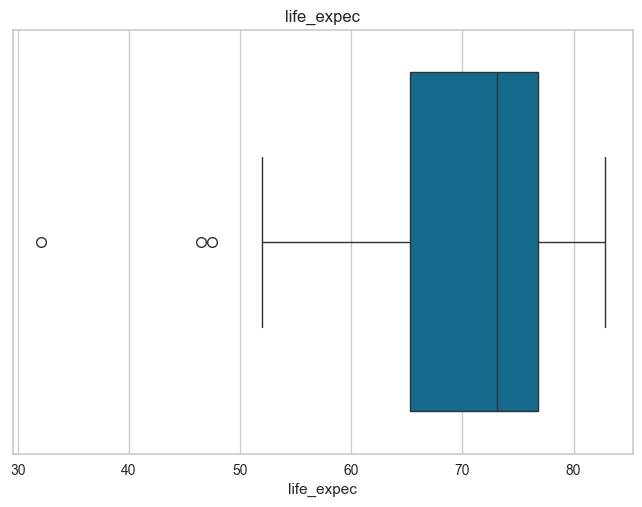

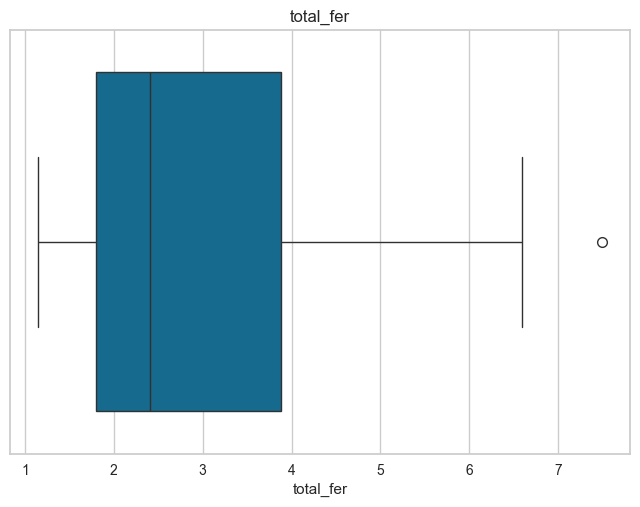

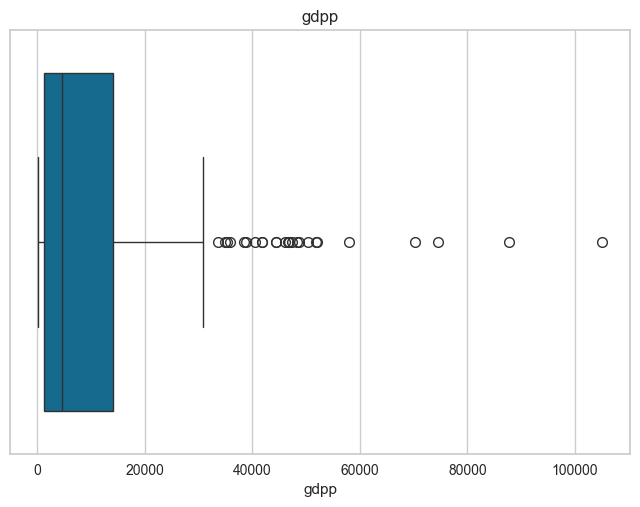

In [15]:
for i in data.columns:
    sns.boxplot(data[i],orient='h')
    plt.title(i)
    plt.show()

In [16]:
# Lets use 2.5*IQR and cap these outliers

for i in ['income','gdpp','inflation']:
    q1,q3=np.quantile(data[i],(0.25,0.75))
    iqr=q3-q1
    ul=q3+(2.5*iqr)
    ll=q1-(2.5*iqr)
    data[i]=np.where(data[i]>ul,ul,data[i])
    data[i]=np.where(data[i]<ll,ll,data[i])

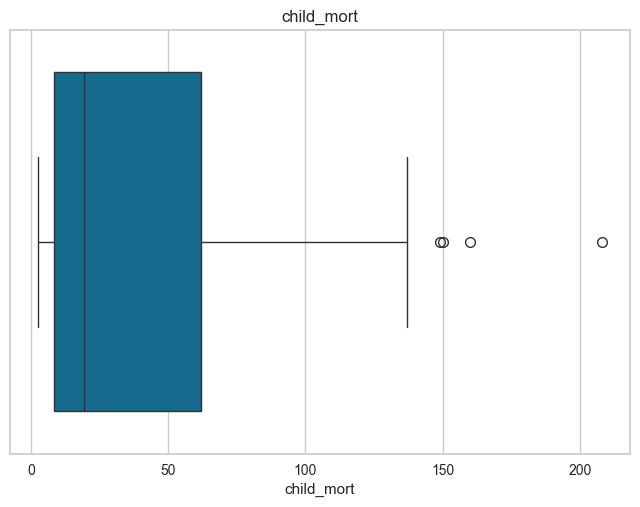

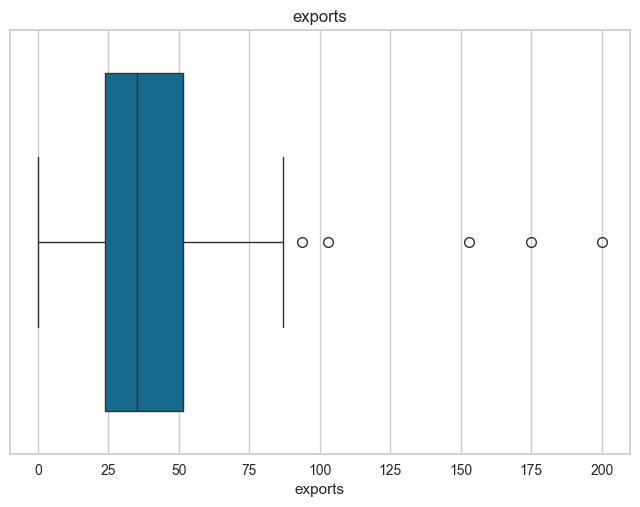

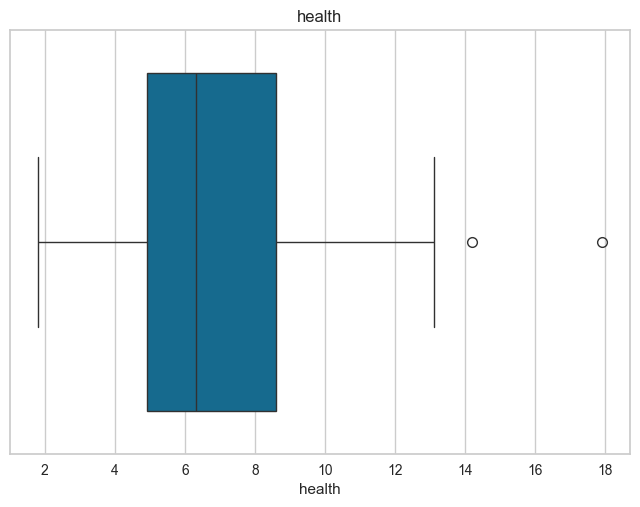

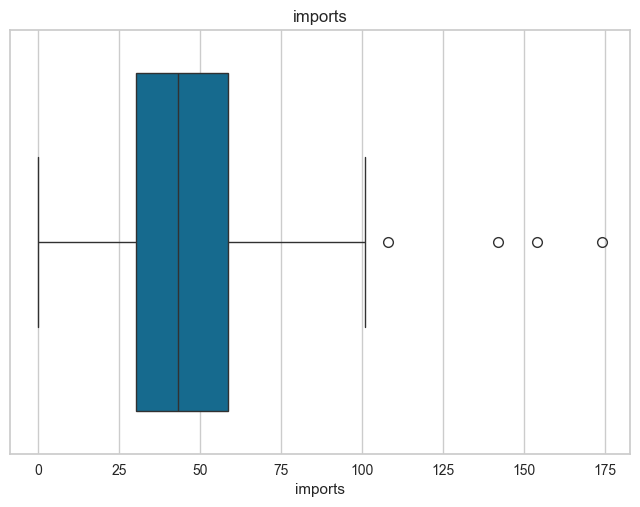

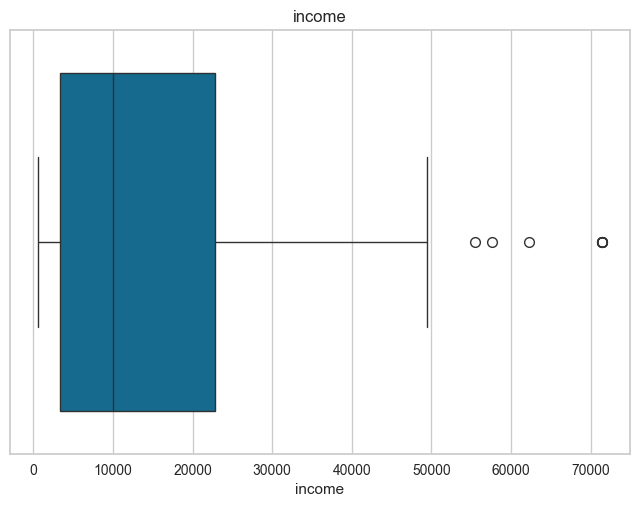

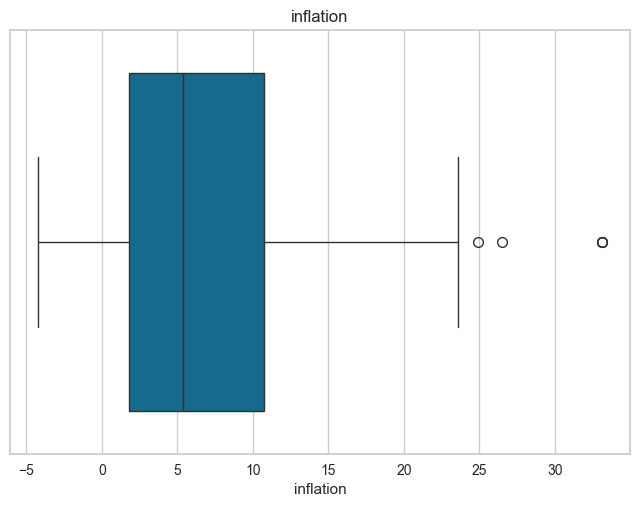

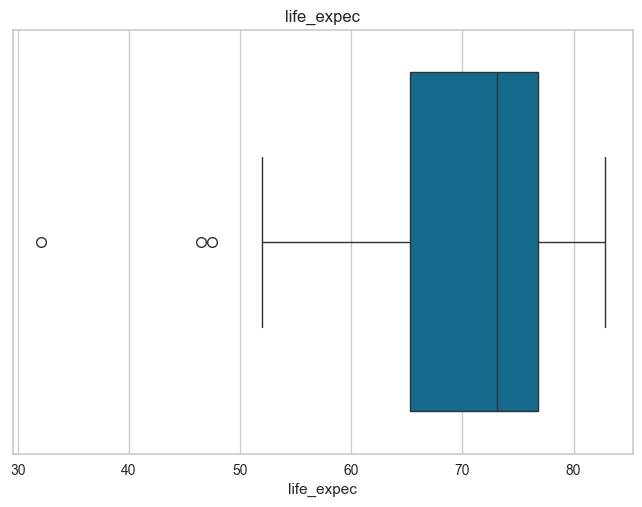

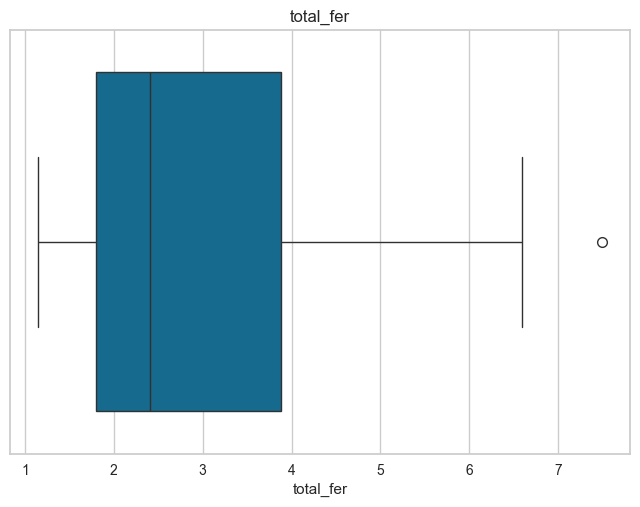

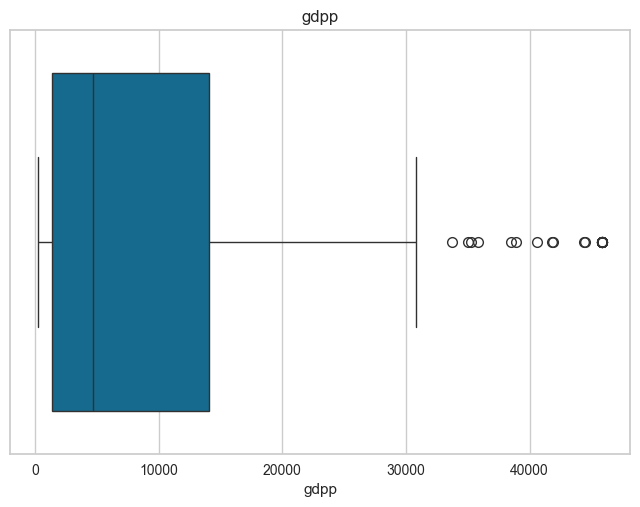

In [17]:
for i in data.columns:
    sns.boxplot(data[i],orient='h')
    plt.title(i)
    plt.show()

### Let's apply PCA on the data to reduce the dimensions

In [18]:
# Step 1: Standardize

In [19]:
sc=StandardScaler()

In [20]:
data_s=pd.DataFrame(sc.fit_transform(data),columns=data.columns,index=data.index)

In [21]:
data_s.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.138280  0.279088 -0.082455 -0.878427   
Albania               -0.538949 -0.479658 -0.097016  0.070837 -0.391534   
Algeria               -0.272833 -0.099122 -0.966073 -0.641762 -0.217727   
Angola                 2.007808  0.775381 -1.448071 -0.165315 -0.627373   
Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.145102   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.303790   -1.619092   1.902882 -0.767399  
Albania              -0.381016    0.647866  -0.859973 -0.526335  
Algeria               1.225166    0.670423  -0.038404 -0.501118  
Angola                2.096738   -1.179234   2.128151 -0.564502  
Antigua and Barbuda  -0.802968    0.704258  -0.541946  0.026399

In [22]:
pca=PCA(n_components=9)

In [23]:
data_pca=pca.fit_transform(data_s)

In [24]:
data_pca=pd.DataFrame(data_pca,columns=range(1,10),index=data.index)

In [25]:
data_pca

1         2         3         4         5  \
country                                                                 
Afghanistan         -2.976983 -0.032841  0.932610  0.789299  0.002730   
Albania              0.420479 -0.456931  0.080523 -1.318985  0.111028   
Algeria             -0.423936 -0.407533 -1.658485 -0.478689  0.389953   
Angola              -3.167254  1.504973 -1.630109  1.526512  0.096293   
Antigua and Barbuda  1.116417  0.224792  0.116042 -0.862830 -0.369262   
...                       ...       ...       ...       ...       ...   
Vanuatu             -0.841494  0.680450  0.332940 -0.797223 -0.510282   
Venezuela           -0.579641 -1.253703 -3.079860  0.484351  1.943542   
Vietnam              0.327842  1.533762 -0.231331 -1.004264  1.288335   
Yemen               -2.136859 -0.163968 -1.500716  0.450588  1.107161   
Zambia              -2.989555  0.343467 -0.158097  0.953086 -0.012743   

                            6         7         8         9  
country                                                      
Afghanistan          0.262191 -0.416696 -0.373026  0.076627  
Albania             -0.042683 -0.163434  0.273873  0.148639  
Algeria              0.371683  0.080897  0.233012  0.057846  
Angola               0.451189  0.334483  0.330121 -0.259418  
Antigua and Barbuda  0.235218 -0.200057  0.034177  0.089805  
...                       ...       ...       ...       ...  
Vanuatu              0.009033  0.122974 -0.685673 -0.291868  
Venezuela           -0.110130 -0.253283  0.163679 -0.381777  
Vietnam             -0.050252  0.167081  0.262921 -0.163044  
Yemen                0.489837 -0.137117 -0.015546 -0.124555  
Zambia              -0.255166  0.327837 -0.777784 -0.228843  

[167 rows x 9 columns]

In [26]:
# Kaiser criterion
pca.explained_variance_

array([4.31207333, 1.56974591, 1.19878755, 0.92471919, 0.5956137 ,
       0.22264376, 0.10396867, 0.0834602 , 0.04320456])

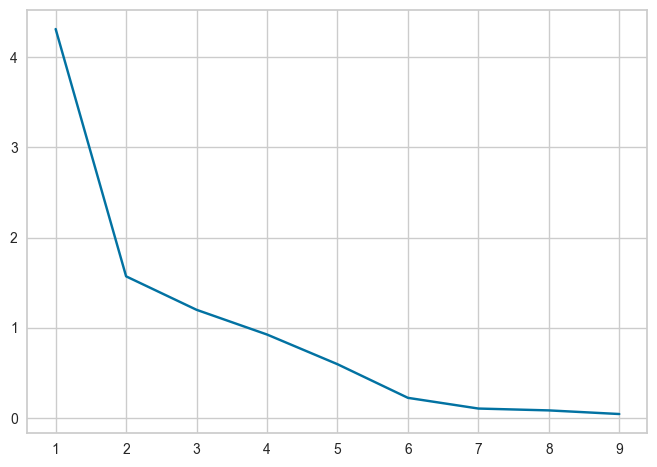

In [27]:
# Scree Plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [28]:
# Total explained ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.47625028, 0.64962209, 0.78202311, 0.88415443, 0.94993745,
       0.97452751, 0.98601041, 0.99522824, 1.        ])

In [29]:
# Lets reduce it to 5 dimensions
pca_final=PCA(n_components=5)

In [30]:
data_pca=pca_final.fit_transform(data_s)

In [31]:
data_pca=(pd.DataFrame(data_pca,columns=range(1,6),index=data.index))

In [32]:
data_pca

1         2         3         4         5
country                                                              
Afghanistan         -2.976983 -0.032841  0.932610  0.789299  0.002730
Albania              0.420479 -0.456931  0.080523 -1.318985  0.111028
Algeria             -0.423936 -0.407533 -1.658485 -0.478689  0.389953
Angola              -3.167254  1.504973 -1.630109  1.526512  0.096293
Antigua and Barbuda  1.116417  0.224792  0.116042 -0.862830 -0.369262
...                       ...       ...       ...       ...       ...
Vanuatu             -0.841494  0.680450  0.332940 -0.797223 -0.510282
Venezuela           -0.579641 -1.253703 -3.079860  0.484351  1.943542
Vietnam              0.327842  1.533762 -0.231331 -1.004264  1.288335
Yemen               -2.136859 -0.163968 -1.500716  0.450588  1.107161
Zambia              -2.989555  0.343467 -0.158097  0.953086 -0.012743

[167 rows x 5 columns]

## K-Means Clustering

In [33]:
# let's make an Elbow plot
kelbow=KElbowVisualizer(KMeans())

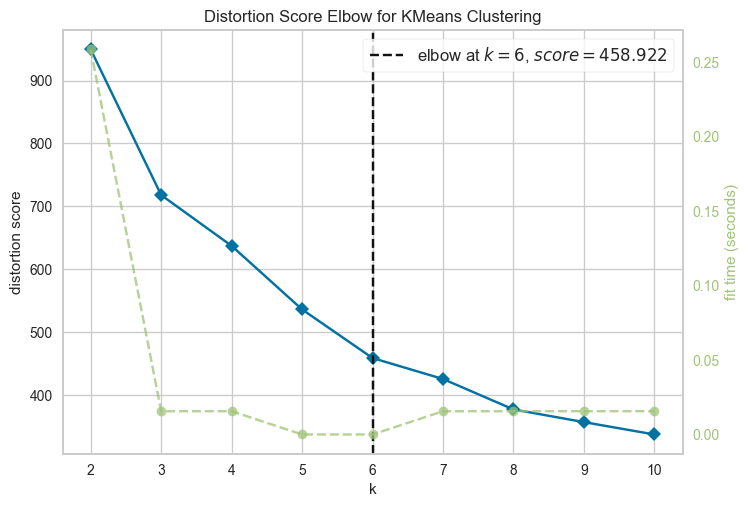

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
kelbow.fit(data_pca)
kelbow.show()

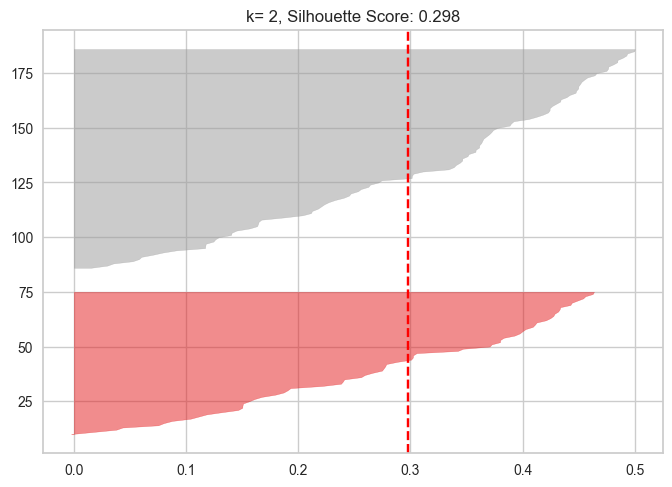

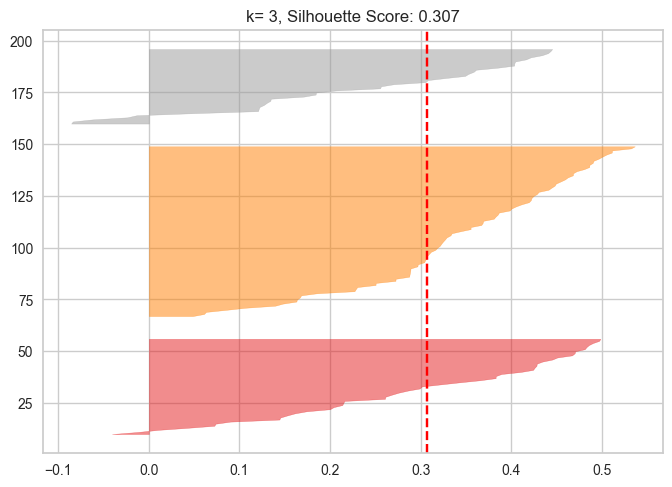

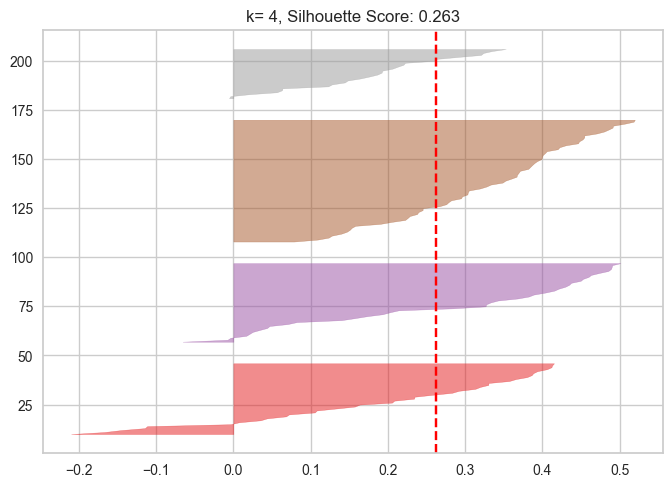

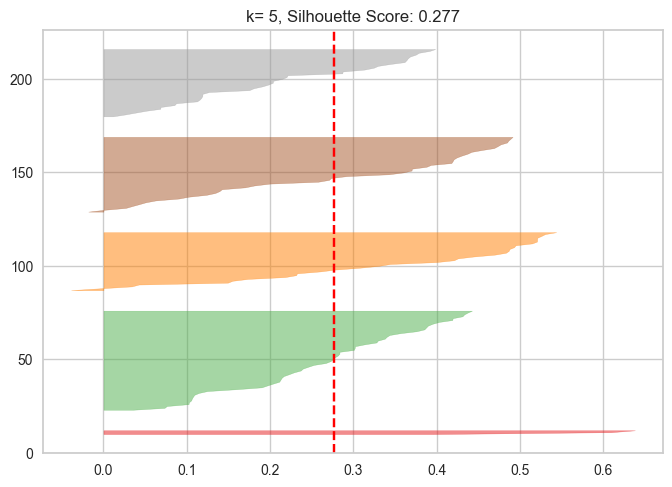

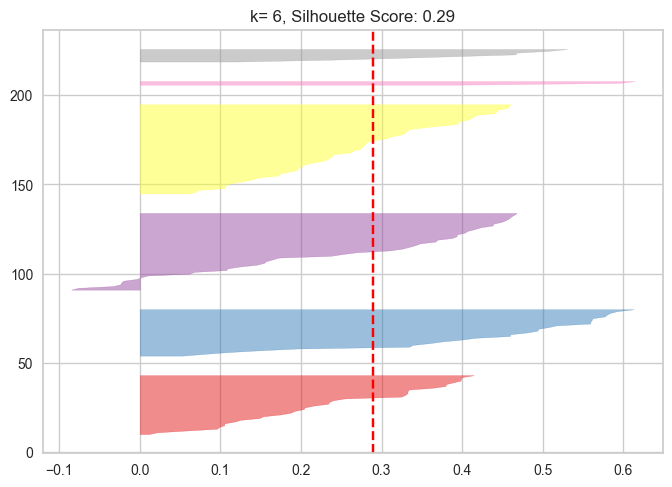

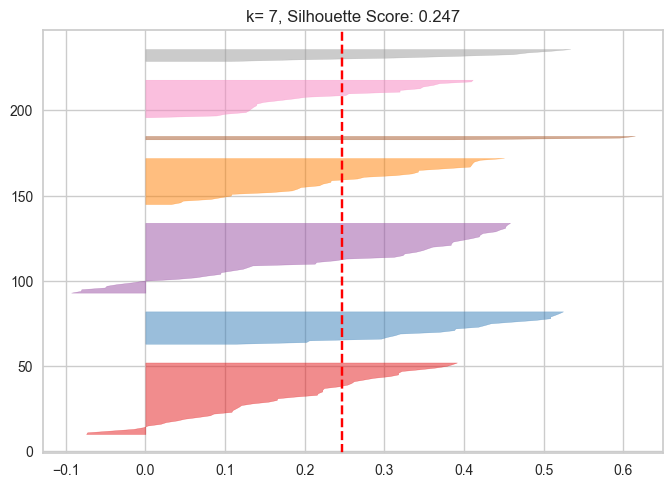

In [35]:
for i in range(2,8):
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title(f'k= {i}, Silhouette Score: {round(sil_viz.silhouette_score_,3)}')
    plt.show()

Inference: When k>=4, we can see very small clusters forming hence we should go with either 2 or 3 clusters.
           If we go with 2 clusters there are no outliers and the clusters have good density. But with 3 clusters, although the Silhouette score increases, there are a few outliers.

In [36]:
# Lets go with k=2

In [37]:
final_kmean=KMeans(n_clusters=3)

In [38]:
kmean_pred=final_kmean.fit_predict(data_pca)

In [39]:
kmean_pred

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

## Business Interpretations

In [40]:
data['kmean_label']=kmean_pred

In [41]:
data

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   
...                         ...      ...     ...      ...      ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7   2950.0       2.62   
Venezuela                  17.1     28.5    4.91     17.6  16500.0      33.10   
Vietnam                    23.3     72.0    6.84     80.2   4490.0      12.10   
Yemen                      56.3     30.0    5.18     34.4   4480.0      23.60   
Zambia                     83.1     37.0    5.89     30.9   3280.0      14.00   

                     life_expec  total_fer     gdpp  kmean_label  
country                                                           
Afghanistan                56.2       5.82    553.0            1  
Albania                    76.3       1.65   4090.0            0  
Algeria                    76.5       2.89   4460.0            0  
Angola                     60.1       6.16   3530.0            1  
Antigua and Barbuda        76.8       2.13  12200.0            0  
...                         ...        ...      ...          ...  
Vanuatu                    63.0       3.50   2970.0            0  
Venezuela                  75.4       2.47  13500.0            0  
Vietnam                    73.1       1.95   1310.0            0  
Yemen                      67.5       4.67   1310.0            1  
Zambia                     52.0       5.40   1460.0            1  

[167 rows x 10 columns]

In [42]:
data['kmean_label'].value_counts()

kmean_label
0    83
1    47
2    37
Name: count, dtype: int64

In [43]:
data.groupby(by='kmean_label').mean()

child_mort    exports    health    imports        income  \
kmean_label                                                             
0             22.025301  40.307096  6.180602  47.518866  12177.951807   
1             92.961702  29.151277  6.388511  42.323404   3942.404255   
2              5.237838  58.097297  8.782973  51.281081  42690.878378   

             inflation  life_expec  total_fer          gdpp  
kmean_label                                                  
0             7.469506   72.802410   2.312892   6227.253012  
1            10.511170   59.187234   5.008085   1922.382979  
2             2.588432   79.956757   1.755676  36905.405405

In [44]:
silhouette_score(data_pca,kmean_pred)

np.float64(0.3067977051283318)

In [45]:
# Lets Visualize these clusters

In [46]:
centroids=final_kmean.cluster_centers_

In [47]:
centroids

array([[ 0.135945  , -0.05639663, -0.24693038, -0.74951387,  0.1648213 ],
       [-2.48753496,  0.30594747,  0.29912789,  0.65818645, -0.10780991],
       [ 2.854884  , -0.26212462,  0.17395163,  0.84526724, -0.23278656]])

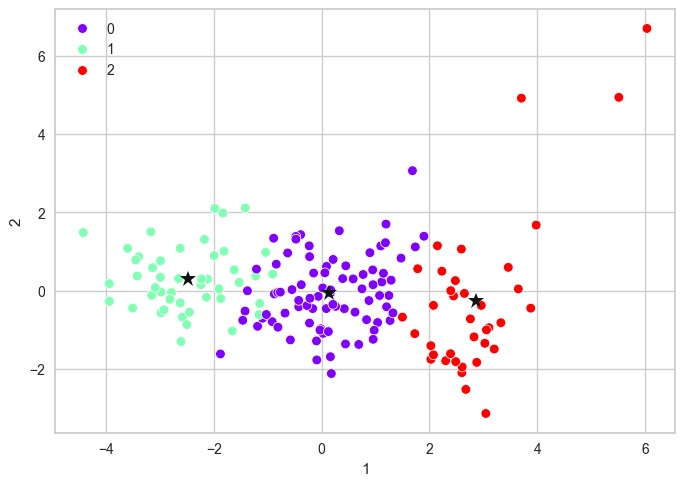

In [48]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=kmean_pred,palette='rainbow')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=12,color='k')

## Aggloromative Clustering

In [49]:
# Step 1: Distance Matrix

In [50]:
dist_matrix=euclidean_distances(data_pca)

In [51]:
dist_matrix.shape

(167, 167)

In [52]:
link_matrix=linkage(dist_matrix,method='ward')

In [53]:
link_matrix[:10,:]

array([[ 41.        , 121.        ,   1.32413918,   2.        ],
       [ 50.        , 116.        ,   1.43949751,   2.        ],
       [ 34.        , 119.        ,   1.72602078,   2.        ],
       [  8.        ,  44.        ,   1.72608538,   2.        ],
       [ 75.        , 158.        ,   1.76310541,   2.        ],
       [ 17.        ,  28.        ,   1.97336634,   2.        ],
       [  4.        ,  24.        ,   2.16534337,   2.        ],
       [ 18.        ,  52.        ,   2.18147315,   2.        ],
       [ 48.        ,  61.        ,   2.20130579,   2.        ],
       [ 63.        , 166.        ,   2.23603046,   2.        ]])

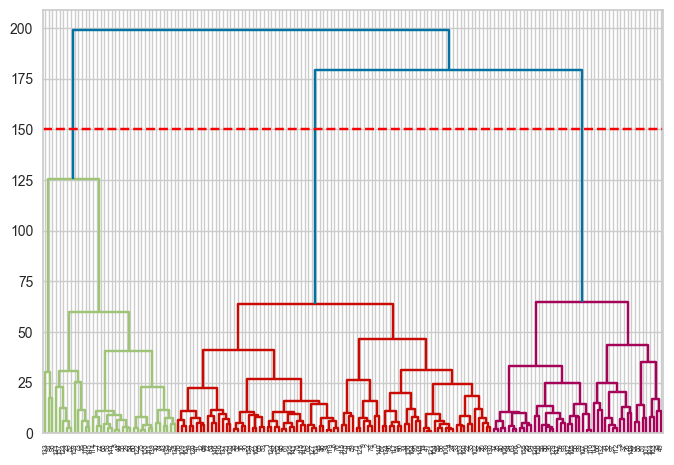

In [54]:
dendrogram(link_matrix)
plt.axhline(y=150,color='red',ls='--')
plt.show()

In [55]:
# Lets take k=3

In [56]:
final_agglo=AgglomerativeClustering(n_clusters=3)

In [57]:
pred_agglo=final_agglo.fit_predict(data_pca)

In [58]:
silhouette_score(data_pca,pred_agglo)

np.float64(0.25980013268090285)

<Axes: xlabel='1', ylabel='2'>

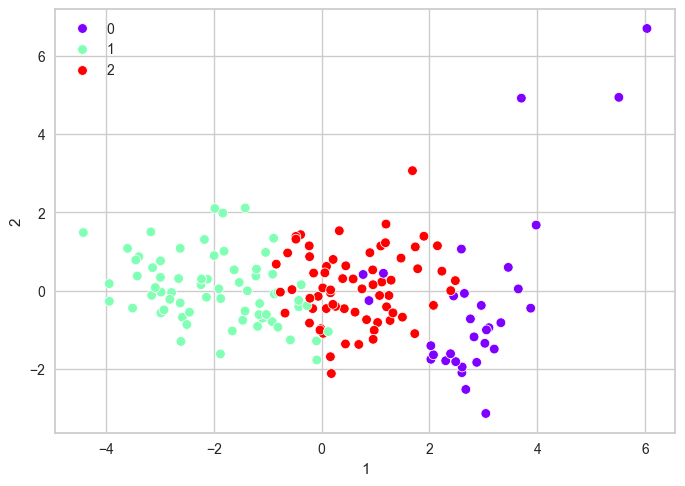

In [59]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=pred_agglo,palette='rainbow')

#### Inference: Since K-Means has better silhouette score, which can also be seen in the scatter plot (Aggloromative Clustering has more  overlapping datapoints). We can go with K-Means clustering with k=3 as final model.

In [60]:
data.groupby(by='kmean_label').mean()

child_mort    exports    health    imports        income  \
kmean_label                                                             
0             22.025301  40.307096  6.180602  47.518866  12177.951807   
1             92.961702  29.151277  6.388511  42.323404   3942.404255   
2              5.237838  58.097297  8.782973  51.281081  42690.878378   

             inflation  life_expec  total_fer          gdpp  
kmean_label                                                  
0             7.469506   72.802410   2.312892   6227.253012  
1            10.511170   59.187234   5.008085   1922.382979  
2             2.588432   79.956757   1.755676  36905.405405

In [61]:
data['kmean_label']=data['kmean_label'].map({0:'Developing',
                         1:'Developed',
                         2:'Underdeveloped'})

In [62]:
data

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   
...                         ...      ...     ...      ...      ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7   2950.0       2.62   
Venezuela                  17.1     28.5    4.91     17.6  16500.0      33.10   
Vietnam                    23.3     72.0    6.84     80.2   4490.0      12.10   
Yemen                      56.3     30.0    5.18     34.4   4480.0      23.60   
Zambia                     83.1     37.0    5.89     30.9   3280.0      14.00   

                     life_expec  total_fer     gdpp kmean_label  
country                                                          
Afghanistan                56.2       5.82    553.0   Developed  
Albania                    76.3       1.65   4090.0  Developing  
Algeria                    76.5       2.89   4460.0  Developing  
Angola                     60.1       6.16   3530.0   Developed  
Antigua and Barbuda        76.8       2.13  12200.0  Developing  
...                         ...        ...      ...         ...  
Vanuatu                    63.0       3.50   2970.0  Developing  
Venezuela                  75.4       2.47  13500.0  Developing  
Vietnam                    73.1       1.95   1310.0  Developing  
Yemen                      67.5       4.67   1310.0   Developed  
Zambia                     52.0       5.40   1460.0   Developed  

[167 rows x 10 columns]

In [63]:
print('Under Developed Countries')
for i in data[data['kmean_label']=='Underdeveloped'].index:
    print(i,end=' , ')

Under Developed Countries
Australia , Austria , Bahamas , Bahrain , Belgium , Brunei , Canada , Cyprus , Czech Republic , Denmark , Finland , France , Germany , Greece , Iceland , Ireland , Israel , Italy , Japan , Kuwait , Luxembourg , Malta , Netherlands , New Zealand , Norway , Portugal , Qatar , Singapore , Slovak Republic , Slovenia , South Korea , Spain , Sweden , Switzerland , United Arab Emirates , United Kingdom , United States , 

## World Map

In [64]:
import plotly.express as px

In [65]:
pd.DataFrame({'Country':data.index,'Status':data['kmean_label']})

Country      Status
country                                             
Afghanistan                  Afghanistan   Developed
Albania                          Albania  Developing
Algeria                          Algeria  Developing
Angola                            Angola   Developed
Antigua and Barbuda  Antigua and Barbuda  Developing
...                                  ...         ...
Vanuatu                          Vanuatu  Developing
Venezuela                      Venezuela  Developing
Vietnam                          Vietnam  Developing
Yemen                              Yemen   Developed
Zambia                            Zambia   Developed

[167 rows x 2 columns]

In [66]:
df=pd.DataFrame({'Country':data.index,'Status':data['kmean_label']})

In [67]:
figure=px.choropleth(df,locationmode='country names',
                    locations='Country',color=df['Status'],
                    color_discrete_map={'Developed':'green',
                                       'Developing':'blue',
                                       'Underdeveloped':'red'})
figure.show()